In [1]:
import pandas as pd
import numpy as np


In [43]:
movie = pd.read_csv('data/movie.csv')
movie[['duration']].head(10)
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [44]:
movie_exam= movie[['title_name','title_year','score','content_rating']]

KeyError: "['score', 'title_name'] not in index"

In [5]:
movie_long = movie['duration'] > 120
movie_long

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: duration, Length: 4916, dtype: bool

In [3]:

# 위의 결과는 정확하지 않습니다.
# 왜냐면, duration == NaN인 경우에도 boolean 값이 False 가 되어있기 때문이죠.
# 그래서 정확한 계산을 위해선, NaN 값 처리가 필요합니다.
# 항상 계산하기 전, 결측치 확인이 중요합니다
# gt: >120
movie['duration'].dropna().gt(120).mean()*100

21.199755152009793

In [6]:
# object 형태이기에 숫자로 안 나옵니다.
# 형변환을 해줍시다.
movie_long.astype(int).describe()

count    4916.000000
mean        0.211351
std         0.408308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: duration, dtype: float64

In [7]:
# 평점이 8점을 넘고 등급이 PG-13 이며, 출시년이 2000년 이전이거나 2009 이후인 영화만 뽑고 싶습니다
c1 = movie.imdb_score > 8
c2 = movie.content_rating == 'PG-13'
c3 = (movie.title_year<2000) | (movie.title_year>2009)
#세 조건을 동시에 고려하기 위해 & 로 묶어줍니다.
c_final = c1 & c2 & c3

In [8]:
c_a1 = movie.imdb_score > 8
c_a2 = movie.content_rating == 'PG-13'
c_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
c_a_final = c_a1 & c_a2 & c_a3

In [9]:
c_b1 = movie.imdb_score < 5
c_b2 = movie.content_rating == 'R'
c_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
c_b_final = c_b1 & c_b2 & c_b3

In [10]:
c_final = c_a_final | c_b_final

In [11]:
movie.loc[c_final].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [12]:

#iloc 에서는 bool 배열을 지원하지 않지만, to_numpy()메서드를 활용하면 가능합니다.
#movie.iloc[c_final]
c_final.to_numpy()

array([False, False, False, ..., False, False, False])

In [13]:
movie.iloc[c_final.to_numpy()].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [14]:
college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [15]:
college2 = college.set_index("STABBR")
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [16]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)].head()

college2.loc[states].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [17]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [18]:
#loc의 기본값은 Series 입니다. 이를 DF로 유지하려면, 인덱스 값을 리스트로 전달합니다.
college_unique.loc[['Stanford University']]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [19]:
#도시와 주 이름을 묶어 인덱스로 만들고, 이를 정렬합니다.
#기억하세요. 정렬된 인덱스는 빠름!
college.index = (
 college['CITY'] + ', ' + college['STABBR']
)
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [20]:
emp = pd.read_csv('data/employee.csv')
emp.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [21]:
#이제 위에서 만든 조건을 필터로 넣어봅시다.
depts = ['Houston Police Department-HPD','Houston Fire Department (HFD)']
c_dept = emp.DEPARTMENT.isin(depts)
c_gen = emp.GENDER == 'Female'
#c_sal = (emp.BASE_SALARY >= 80000) & (emp.BASE_SALARY <= 120000)
#between 조건은 이렇게도 표현할 수 있습니다.
#숫자 가운데 _ 는 자리수를 보기 좋게 표시한 것으로 값에는 전혀 영향이 없습니다.
c_sal = emp.BASE_SALARY.between(80_000, 120_000)

In [22]:
c_final = c_dept & c_gen & c_sal

In [23]:
cols = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

qs = (
 "DEPARTMENT in @depts "
 "and GENDER == 'Female'"
 "and 80000 <= BASE_SALARY <= 120000"
)
emp_filtered = emp.query(qs)
emp_filtered[cols].head()



,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [24]:
top10_depts = (
 emp.DEPARTMENT.value_counts().index[:10].tolist()
)

In [25]:
qs = "DEPARTMENT not in @top10_depts and GENDER=='Female'"
emp.query(qs).head()


,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


In [26]:
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

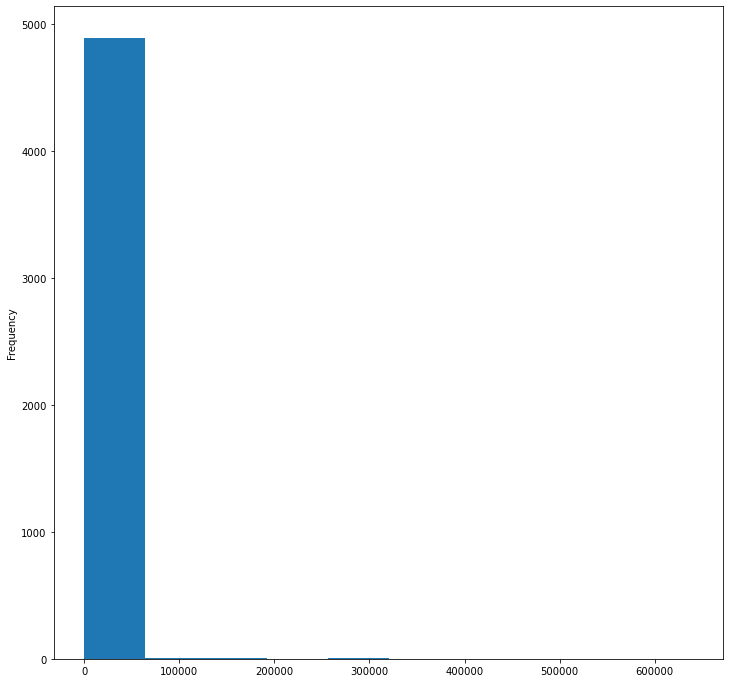

In [27]:
#하지만 그림이 너무 작아요... 어쩔 수 없이 plt를 부릅니다.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
fb_likes.plot.hist()

In [29]:
c_high = fb_likes < 20_000
fb_likes.where(c_high, 20000)

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
                                               ...   
Signed Sealed Delivered                         637.0
The Following                                   841.0
A Plague So Pleasant                              0.0
Shanghai Calling                                946.0
My Date with Drew                                86.0
Name: actor_1_facebook_likes, Length: 4909, dtype: float64

In [30]:
c_low = fb_likes > 300
fb_likes_cap = fb_likes.where(c_high, other=20000).where(c_low, 300)

In [31]:
fb_likes_cap2 = fb_likes.clip(300, 20000)

In [32]:
c1 = movie.title_year >= 2010
c2 = movie.title_year.isna()
c_all = c1 | c2
movie[c_all]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Newlyweds,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000


In [34]:
movie.mask(c_all)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Following,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Plague So Pleasant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
movie_mask = movie.mask(c_all).dropna(how='all')

In [36]:
#위의 과정은 불리언 인덱싱을 살짝 복잡하게 보여준 것이죠?
#간단히는 아래와 같이 표현할겁니다.
movie_bool = movie[movie.title_year < 2010]

In [37]:
# 이 현상은 mask 를 사용할 때 많은 결측치를 만들어냈고, 
# 이 때문이 int 가 아닌 float 형태로 변환되었기 때문입니다.
# 형식에 상관 없이 값을 비교하고 싶을 땐 아래와 같이 합니다.
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_bool, movie_mask, check_dtype=False)
#다른 경우 애러 발생!